### Task #2: Sequel Success Prediction
> 1. Given the franchises discovered from task #1, suppose someone wants to predict the success of a sequel that is to be launched, and she/he will partner with you for the task. The ask here is not to develop a prediction model, rather, you need to develop data analysis notebooks for the following subtasks:
> 2. Create ground truth for training dataset, similar to the following output: movieId, franchiseId, 0 or 1
> 3. 0 means “not successful”, “1” means successful.
> 4. You need to provide a clear and reasonable definition of “success”.
> 5. Come up with features that can be predictive of sequel success, for each feature, demonstrate why it is predictive or not.
> 6. Create training dataset that consists of feature vector and ground truth. No need to do train-test split.
> 7. Note: if you choose to skip task #1, you can use “belong_to_collection” column as input to task #2.

### Notes

1. evaluate revenue over time 
2. visuals for revenue, genre, keyword, popularity, rating, vote average
3. consider revenue diff, and rating score diff as success indicator score (0,1)

In [70]:
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:100% !important; }</style>"))

import json
import ast

import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator

%matplotlib inline

import scipy as sp
import chart_studio
from chart_studio.plotly import plot, iplot
chart_studio.tools.set_credentials_file(username='MJOAN', api_key="3W9LZDIBHnJ8YFackG64")

In [71]:
franch_ratkey = pd.read_csv('franchise_ratings_keywords.csv', engine='python', encoding='utf8', parse_dates=['release_date'])

In [72]:
franchises = franch_ratkey.copy()

In [73]:
franchises = franchises.drop(columns=['Unnamed: 0'])

In [74]:
franchises['release_date'] = pd.to_datetime(franchises['release_date'], format='%Y%m%d', errors='coerce').dt.strftime("%d-%m-%Y")
franchises['release_date'].dtype

dtype('O')

In [75]:
franchises.columns  

Index(['budget', 'id', 'imdb_id', 'original_language', 'title', 'popularity',
       'release_date', 'revenue', 'runtime', 'vote_average', 'collection_id',
       'collection_name', 'production companies', 'production_countries',
       'genres', 'rating', 'rating_timestamp', 'key_agg'],
      dtype='object')

#### Features: 

> 1. revenue 
> 2. release date 
> 3. metrics: popularity, vote_average, rating 

##### other features: 
> 4. keywords
> 5. genres
> 6. production companies and production countries
> 7. original language

#### Visualizing potential features

In [76]:
franchises = franchises.sort_values('revenue', ascending=False).head(500)

In [77]:
data = {'date': franchises['release_date'], 'rev': franchises['revenue']}
rev_over_time = pd.DataFrame(data, columns = ['date', 'rev'])

In [78]:
rev_over_time['date'] = pd.to_datetime(rev_over_time['date'])
rev_over_time.index = rev_over_time['date']
del rev_over_time['date']

In [79]:
rev_over_time.head()

,rev
date,
2015-04-22,1405403694
2003-01-12,1118888979
2006-06-20,1065659812
2011-05-14,1045713802
2008-07-16,1004558444


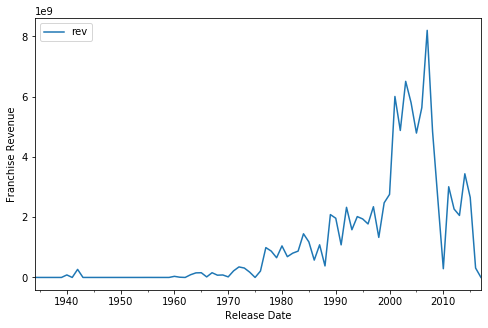

In [82]:
rev_over_time.index = pd.to_datetime(rev_over_time.index)
rev_over_time.resample('Y').sum().plot(figsize=(8,5), fontsize=10)
plt.xlabel("Release Date", fontsize=10)
plt.ylabel("Franchise Revenue",fontsize=10)
plt.show();

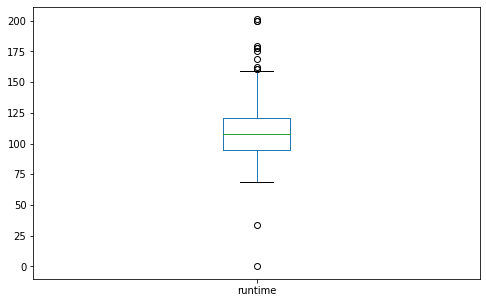

In [20]:
plt.figure(figsize=(8,5))
franchises.runtime.plot(kind='box');

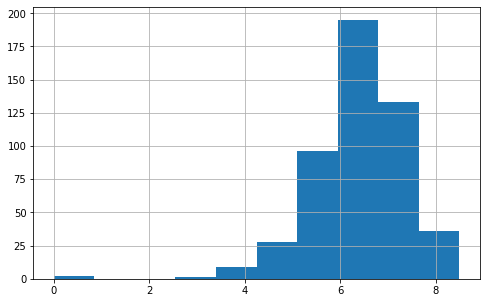

In [21]:
plt.figure(figsize=(8,5))
franchises.vote_average.hist();

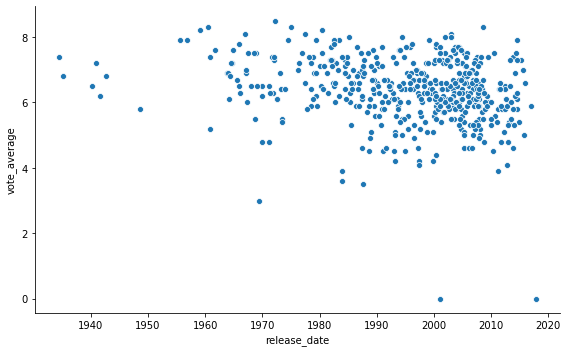

In [118]:
franchises['release_date'] = pd.to_datetime(franchises['release_date'], errors='coerce')

g = sns.relplot(x="release_date", y="vote_average", kind="scatter", data=franchises)
g.fig.set_size_inches(8, 5)

freq = int(2)
ax.set_xticklabels(franchises.iloc[::freq].release_date.dt.year)
fig.autofmt_xdate()
plt.tight_layout()
plt.show();

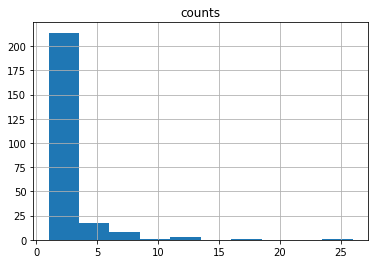

In [101]:
genres_vc = franchises.genres.value_counts(dropna=True, sort=True) 
genres_df = pd.DataFrame(genres_vc)
genres_df = genres_df.reset_index()
genres_df.columns = ['genres', 'counts']
genres_df.hist(); 

In [103]:
import collections
from collections import Counter 
import functools

dataset = genres_df.genres.str.split(',')  
genres_list_to_count = functools.reduce(lambda x,y: x + y, dataset)  

def most_frequent_genre(genres_list_to_count): 
    word_counter = collections.Counter(genres_list_to_count)
    for word, count in word_counter.most_common(1):
        return word_counter

genre_rated = most_frequent_genre(genres_list_to_count)
genre_rated

Counter({"'Comedy'": 23,
         "'Adventure'": 37,
         " 'Action'": 54,
         " 'Thriller'": 76,
         "'Drama'": 23,
         "'Horror'": 19,
         "'Action'": 51,
         " 'Science Fiction'": 47,
         "'Science Fiction'": 19,
         " 'Adventure'": 53,
         " 'Romance'": 16,
         " 'Crime'": 40,
         " 'Mystery'": 32,
         " 'Fantasy'": 40,
         " 'Family'": 41,
         "'Western'": 3,
         " 'Comedy'": 54,
         "'Music'": 2,
         " 'War'": 6,
         " 'Drama'": 35,
         "'Fantasy'": 20,
         " 'Horror'": 23,
         "'Animation'": 12,
         "'Crime'": 10,
         "'Thriller'": 14,
         "'Family'": 4,
         " 'Animation'": 13,
         "'Romance'": 3,
         " 'Music'": 5,
         " 'Western'": 3,
         " 'History'": 4,
         "'Documentary'": 2,
         " 'Foreign'": 1,
         "'Mystery'": 2,
         "'War'": 1,
         " 'TV Movie'": 1})

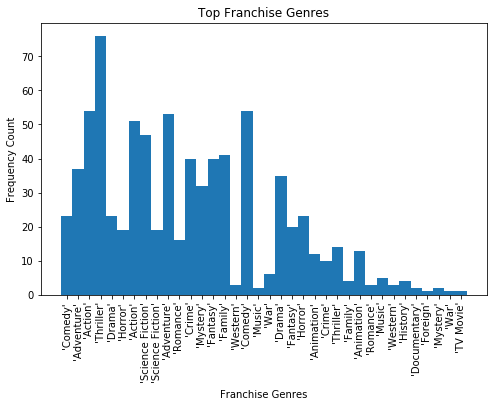

In [104]:
labels, values = zip(*Counter(genre_rated).items()) 
plt.figure(figsize=(8,5))
plt.xlabel('Franchise Genres')
plt.ylabel('Frequency Count')
plt.bar(labels, values, width=1) 
plt.title('Top Franchise Genres')
plt.xticks(rotation=90)
plt.show();

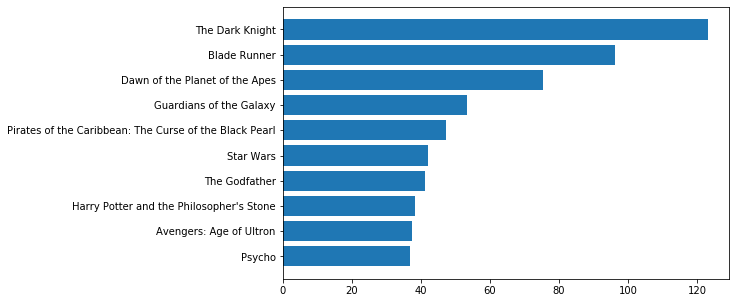

In [105]:
popularity = franchises.sort_values('popularity', ascending=False)
plt.figure(figsize=(8,5))
plt.barh(popularity['title'].head(10),popularity['popularity'].head(10))
plt.gca().invert_yaxis();

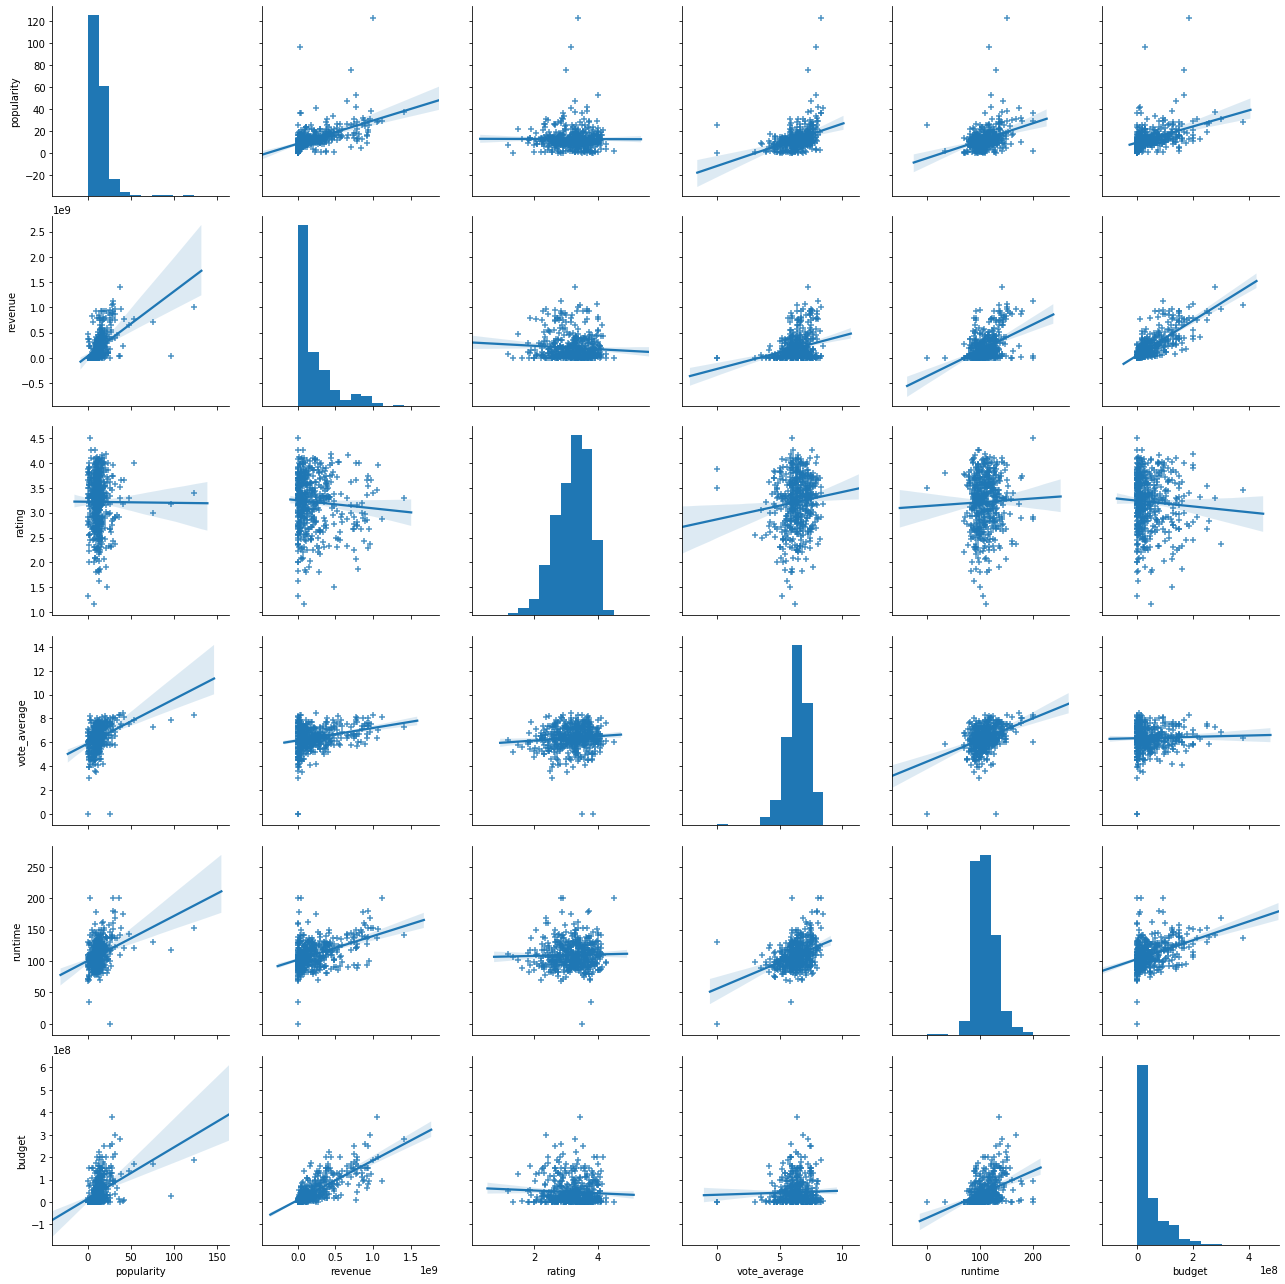

In [130]:
sns.pairplot(franchises[['popularity','revenue', 'rating', 'vote_average', 'runtime', 'budget']], kind="reg", markers="+", palette="husl", height=3);

#### Export Data to CSV

In [399]:
franchises.to_csv('franchises.csv', encoding='utf8')